## Aggregate Report (All Federations)

In [2]:
#install packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re
import matplotlib
import wordcloud #conda install -c conda-forge wordcloud=1.2.1 
from wordcloud import WordCloud, STOPWORDS

### FedCentral

#### Session Duration

52 second

#### Total number of registered users

In [10]:
fedcentral_users = pd.read_csv('Fedcentral_users.csv')
federations = pd.read_csv('federations.csv')
total_users = len(fedcentral_users)
print(total_users)
fedcentral_users['Date Joined'] = fedcentral_users['Date Joined'].str.split(' ',expand=True)[0]
fedcentral_users['Last Login'] = fedcentral_users['Last Login'].str.split(' ',expand=True)[0]
fedcentral_users['Date Joined'].fillna('2013/12/31',inplace=True)
fedcentral_users['Date Joined'] = pd.to_datetime(fedcentral_users['Date Joined'])
fedcentral_users['Last Login'] = pd.to_datetime(fedcentral_users['Last Login'])
fedcentral_users_by_federation = pd.merge(fedcentral_users, federations[['name','code','type']], how='left',left_on = 'Federation', right_on = 'name')
fedcentral_users_by_federation_fed = set(fedcentral_users_by_federation[fedcentral_users_by_federation['type']=='yes']['Federation'])
federations_fed = set(federations[federations['type']=='yes']['name'])
total_fed = len(fedcentral_users_by_federation_fed)

total_registered_fed = fedcentral_users_by_federation_fed
print(len(total_registered_fed))
print(len(fedcentral_users_by_federation_fed)/len(federations_fed))

fedcentral_users_by_federation_net = set(fedcentral_users_by_federation[fedcentral_users_by_federation['type']=='no']['Federation'])

print(len(fedcentral_users_by_federation_net))
federations_net = set(federations[federations['type']=='no']['name'])
print(len(fedcentral_users_by_federation_net)/len(federations_net))

3865
143
0.9930555555555556
45
0.15254237288135594


There are 3865 users are currently registered in FedCentral. 
143 federations have registered FedCentral memebers.  It's almost 99% of all federations. 45 federations have registered FedCentral memebers.  It's 15% of all networks. Federations that don't have registered FedCentral users are shown below:

In [38]:
for fed in federations_fed:
    if fed not in fedcentral_users_by_federation_fed:
        print(fed)

Jewish Federation of Greater Rockford


In [39]:
print(fedcentral_users_by_federation[fedcentral_users_by_federation['type']=='yes']['Email'].count()/3848)
print(fedcentral_users_by_federation[fedcentral_users_by_federation['type']=='no']['Email'].count()/3848)

0.8458939708939709
0.09485446985446985


84% of registered users belong to Federations and 9% of registered users belong to Networks. 

In [40]:
fedcentral_users_growth_rate = fedcentral_users[['Email','Date Joined']]
fedcentral_users_growth_rate.set_index('Date Joined',inplace=True)
fedcentral_users_growth_rate['2017-11-01':'2018-10-31']['Email'].count()

465

465 users joined FedCentral within the past year.

In [41]:
fedcentral_users_growth_cumsum = pd.DataFrame(fedcentral_users_growth_rate.resample('Y')['Email'].count())
fedcentral_users_growth_cumsum.columns=['# New Users']
fedcentral_users_growth_cumsum['Year'] = ['2013','2014','2015','2016','2017','2018']
fedcentral_users_growth_cumsum['Total Users'] = fedcentral_users_growth_cumsum['# New Users'].cumsum().values
fedcentral_users_growth_cumsum.reset_index(inplace=True)
fedcentral_users_growth_cumsum[['Year','# New Users','Total Users']]
fedcentral_users_growth_cumsum['% change'] = round(fedcentral_users_growth_cumsum['Total Users'].pct_change()*100,2)
fedcentral_users_growth_cumsum.loc[2,'# New Users'] = fedcentral_users_growth_cumsum.loc[0:2,'# New Users'].sum() 
fedcentral_users_growth_cumsum.drop(['Date Joined'],axis=1,inplace=True)
fedcentral_users_growth_cumsum.drop(fedcentral_users_growth_cumsum.index[0:2],inplace=True)
fedcentral_users_growth_cumsum[['Year','# New Users','Total Users','% change']]

,Year,# New Users,Total Users,% change
2,2015,1058,1058,16.52
3,2016,1699,2757,160.59
4,2017,676,3433,24.52
5,2018,432,3865,12.58


432 users joined FedCentral within the past year. On average 603 users join FedCentral every year since 2013.  The graph above shows the growth rate of registered users of Fedcentral.

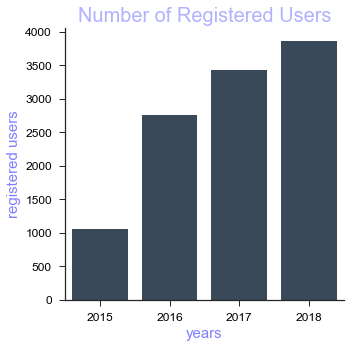

In [256]:
sns.set(style="ticks")

flatui = ["#34495e"]

# This Function takes as input a custom palette
g = sns.barplot(x='Year', y='Total Users', palette=sns.color_palette(flatui),data=fedcentral_users_growth_cumsum,ci=None)

flatui = ["#34495a"]

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(5,5)
# Set the Title of the graph from here
g.axes.set_title('Number of Registered Users',
    fontsize=20,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("years",size = 15,color="b",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("registered users",size = 15,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=12,labelcolor="black")

#### FedCentral: Number of active users per day

In [43]:
active_users_daily = pd.read_csv('active_users_daily.csv',skiprows=1,names=['date','active_users'])
users_daily = round(active_users_daily[active_users_daily['active_users']>30].active_users.mean(),0)
users_daily

198.0

On average 198 FedCentral members use FedCentral daily(weekends and holidays were excluded).

#### FedCentral: Number of active users per week

In [44]:
active_users_weekly = pd.read_csv('active_users_weekly.csv',skiprows=1,names=['date','active_users'])
users_weekly = round(active_users_weekly.active_users.mean()*1.15,0)
users_weekly

827.0

On average 899 FedCentral members use FedCentral monthly(weekends and holidays were excluded).

#### FedCentral: Number of active users per month (average number of unique visits per month)

The table below shows average number of active users per month.

In [110]:
#active_users_monthly = pd.read_csv('active_users_monthly.csv',skiprows=1,names=['date','Active Users'],parse_dates=["date"], index_col="date")
#active_users_monthly = round(active_users_monthly.resample('M')['Active Users'].mean()*1.25,0)
#active_users_monthly = pd.DataFrame(({'Date':active_users_monthly.index, 'Active Users':active_users_monthly.values}))
#active_users_monthly['Date'] = ['November','December','January','February','March','April','May','June','July','August','September','October']
#active_users_monthly['% Registered Users'] = round(active_users_monthly['Active Users']*100/len(fedcentral_users),2)
#active_users_monthly

,Date,Active Users,% Registered Users
0,November,2436.0,63.03
1,December,2673.0,69.16
2,January,2255.0,58.34
3,February,2470.0,63.91
4,March,3349.0,86.65
5,April,3141.0,81.27
6,May,2905.0,75.16
7,June,3160.0,81.76
8,July,2954.0,76.43
9,August,3356.0,86.83


In [26]:
view_user_nov = pd.read_csv('views_user_nov.csv')
view_user_dec = pd.read_csv('views_user_dec.csv')
view_user_jan = pd.read_csv('views_user_jan.csv')
view_user_feb = pd.read_csv('views_user_feb.csv')
view_user_mar = pd.read_csv('views_user_mar.csv')
view_user_apr = pd.read_csv('views_user_apr.csv')
view_user_may = pd.read_csv('views_user_may.csv')
view_user_jun = pd.read_csv('views_user_jun.csv')
view_user_jul = pd.read_csv('views_user_jul.csv')
view_user_aug = pd.read_csv('views_user_aug.csv')
view_user_sep = pd.read_csv('views_user_sep.csv')
view_user_oct = pd.read_csv('views_user_oct.csv')

active_users_monthly = pd.DataFrame()
active_users_monthly['Date'] = ['November','December','January','February','March','April','May','June','July','August','September','October']
active_users_monthly['Active Users'] = [len(set(view_user_nov['User'])),len(set(view_user_dec['User'])),len(set(view_user_jan['User'])),
                                        len(set(view_user_feb['User'])),len(set(view_user_mar['User'])), len(set(view_user_apr['User'])),
                                        len(set(view_user_may['User'])),len(set(view_user_jun['User'])), len(set(view_user_jul['User'])),
                                        len(set(view_user_aug['User'])),len(set(view_user_sep['User'])),len(set(view_user_oct['User']))]
active_users_monthly['% Registered Users'] = round(active_users_monthly['Active Users']*100/len(fedcentral_users),2)

active_users_monthly['Time Spend on Page'] = ''
active_users_monthly['Page Views'] = ''
active_users_monthly['Downloads'] = ''
active_users_monthly['Searches'] = ''

active_users_monthly

,Date,Active Users,% Registered Users,Time Spend on Page,Page Views,Downloads,Searches
0,November,640,16.56,,,,
1,December,596,15.42,,,,
2,January,613,15.86,,,,
3,February,605,15.65,,,,
4,March,671,17.36,,,,
5,April,614,15.89,,,,
6,May,571,14.77,,,,
7,June,667,17.26,,,,
8,July,639,16.53,,,,
9,August,819,21.19,,,,


In [252]:
users_monthly = round(active_users_monthly['Active Users'].mean(),0)
users_monthly 

630.0

In [257]:
round(active_users_monthly['Active Users'].mean(),0)/total_users

0.1630012936610608

The monthly average number of active users is 630. It's about 16.3% of all registered users.

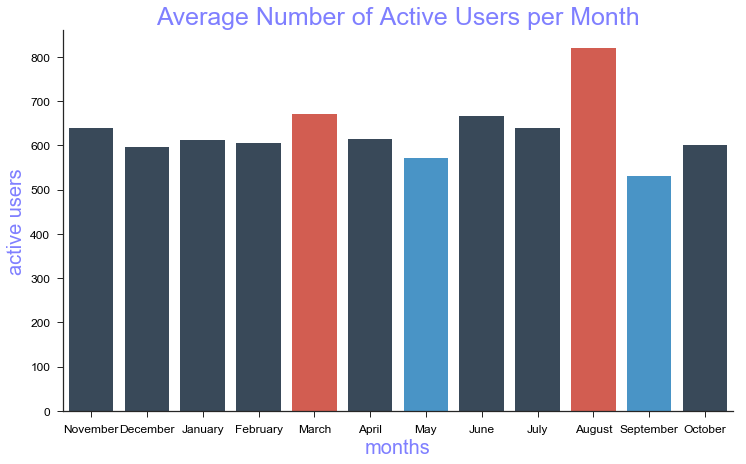

In [259]:
sns.set(style="ticks")

flatui = ["#34495e", "#34495e", "#34495e", "#34495e", "#e74c3c", "#34495e","#3498db","#34495e","#34495e","#e74c3c","#3498db","#34495e"]

# This Function takes as input a custom palette
g = sns.barplot(x="Date", y="Active Users", palette=sns.color_palette(flatui),data=active_users_monthly,ci=None)

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('Average Number of Active Users per Month',
    fontsize=25,color="b",alpha=0.5)
# Set the xlabel of the graph from here
g.set_xlabel("months",size = 20,color="b",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("active users",size = 20,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=12,labelcolor="black")

In [49]:
active_users_fedcentral = pd.DataFrame()
active_users_fedcentral['Time Period'] = ['Daily','Weekly','Monthly']

views1_date = pd.read_csv('views1_date.csv')
views2_date = pd.read_csv('views2_date.csv')
views3_date = pd.read_csv('views3_date.csv')
views4_date = pd.read_csv('views4_date.csv')
views5_date = pd.read_csv('views5_date.csv')
views6_date = pd.read_csv('views6_date.csv')
views8_date = pd.read_csv('views8_date.csv')
views9_date = pd.read_csv('views9_date.csv')
views10_date = pd.read_csv('views10_date.csv')

views_date = pd.concat([views1_date,views2_date,views3_date,views4_date,views5_date,views6_date,views8_date,views9_date,views10_date])
views_date['Date'] = pd.to_datetime(views_date['Date'], format='%Y%m%d')
views_date.set_index('Date',inplace=True)

views1_user = pd.read_csv('views1_user.csv')
views2_user = pd.read_csv('views2_user.csv')
views3_user = pd.read_csv('views3_user.csv')
views4_user = pd.read_csv('views4_user.csv')
views5_user = pd.read_csv('views5_user.csv')
views6_user = pd.read_csv('views6_user.csv')
views8_user = pd.read_csv('views8_user.csv')
views9_user = pd.read_csv('views9_user.csv')

views_user = pd.concat([views1_user,views2_user,views3_user,views4_user,views5_user,views6_user,views8_user,views9_user])

active_users_fedcentral['Average Active Users'] = [users_daily,users_weekly,users_monthly]
active_users_fedcentral['% Registered Users'] = round(active_users_fedcentral['Average Active Users']/len(total_registered_fed),2)
active_users_fedcentral


,Time Period,Average Active Users,% Registered Users
0,Daily,198.0,1.38
1,Weekly,827.0,5.78
2,Monthly,2785.0,19.48


#### Percent of Federations using FedCentral

In [51]:
print(len(total_registered_fed))
total_active_registered_fed = set(fedcentral_users_by_federation[(fedcentral_users['Last Login']>'2017/11/01') & (fedcentral_users_by_federation['type']=='yes')]['Federation'])
print(len(total_active_registered_fed))
print(round(len(total_active_registered_fed)*100/len(total_registered_fed),0))

143
139
97.0


Users from 143 federations are registered on FedCentral. Users from 139 federations were active (logged in at least ones within the past year) on FedCentral within the past year. It means that 97% of registered federations used FedCentral within the past year. Federations that weren't active within the past year are displayed below:

In [52]:
for fed in total_registered_fed:
    if fed not in total_active_registered_fed:
        print(fed)

Jewish Federation of Tulsa
Jewish Federation of Sioux City
Champaign-Urbana Jewish Federation
Jewish Federation of New Mexico


In [53]:
total_registered_net = set(fedcentral_users_by_federation[fedcentral_users_by_federation['type']=='no']['Federation'])
print(len(total_registered_net))
total_active_registered_net = set(fedcentral_users_by_federation[(fedcentral_users['Last Login']>'2017/11/01') & (fedcentral_users_by_federation['type']=='no')]['Federation'])
print(len(total_active_registered_net))
print(round(len(total_active_registered_net)/len(total_registered_net)*100,0))

45
36
80.0


In [54]:
for net in total_registered_net:
    if net not in total_active_registered_net:
        print(net)

OREGON
NEW HAMPSHIRE
Ithaca Area United Jewish Community
North Louisiana Jewish Federation
AIKEN
CENTRAL MICHIGAN
Jewish Federation of Broome County
Federated Jewish Charities of Charleston
JCC-Federation of San Luis Obispo


In [55]:
users_fedcentral = pd.DataFrame(columns=['category','# registered','% registered','# active past year','% active past year'])
users_fedcentral['category'] = ['Users','Ferderations','Newtworks']
users_fedcentral['# registered'] = [total_users,len(total_registered_fed),len(total_registered_net)]
users_fedcentral['% registered'] = ['NaN', round(len(total_registered_fed)*100/len(federations_fed),2),round(len(total_registered_net)*100/len(federations_net),2)]
users_fedcentral['# active past year'] = ['NaN',len(total_active_registered_fed),len(total_active_registered_net)]
users_fedcentral['% active past year'] = ['NaN',round(len(total_active_registered_fed)*100/len(total_registered_fed),2),round(len(total_active_registered_net)*100/len(total_registered_net),2)]
users_fedcentral

,category,# registered,% registered,# active past year,% active past year
0,Users,3865,NaN,NaN,NaN
1,Ferderations,143,99.31,139,97.2
2,Newtworks,45,15.25,36,80


#### Page views, assets downloads, assets views and searches

In [122]:
views1_fed = pd.read_csv('views1_fed.csv')
views2_fed = pd.read_csv('views2_fed.csv')
views3_fed = pd.read_csv('views3_fed.csv')
views4_fed = pd.read_csv('views4_fed.csv')
views5_fed = pd.read_csv('views5_fed.csv')
views6_fed = pd.read_csv('views6_fed.csv')
views7_fed = pd.read_csv('views7_fed.csv')
views8_fed = pd.read_csv('views8_fed.csv')
views_fed = pd.concat([views1_fed,views2_fed,views3_fed,views4_fed,views5_fed,views6_fed,views7_fed,views8_fed])
views_fed = pd.merge(views_fed,federations[['code','name','type']],how='left',left_on = 'User Organization', right_on = 'code')
views_fed_fed = views_fed[views_fed['type']=='yes']['User Organization']
views_fed_net = views_fed[views_fed['type']=='no']['User Organization']

searches1_fed = pd.read_csv('searches1_fed.csv')
searches2_fed = pd.read_csv('searches2_fed.csv')
searches3_fed = pd.read_csv('searches3_fed.csv')
searches4_fed = pd.read_csv('searches4_fed.csv')
searches5_fed = pd.read_csv('searches5_fed.csv')
searches6_fed = pd.read_csv('searches6_fed.csv')
searches7_fed = pd.read_csv('searches7_fed.csv')
searches8_fed = pd.read_csv('searches8_fed.csv')
searches9_fed = pd.read_csv('searches9_fed.csv')
searches10_fed = pd.read_csv('searches10_fed.csv')
searches11_fed = pd.read_csv('searches11_fed.csv')
searches_fed = pd.concat([searches1_fed,searches2_fed,searches3_fed,searches4_fed,searches5_fed,searches6_fed,
                         searches7_fed,searches8_fed,searches9_fed,searches10_fed,searches11_fed])
#searches_fed = searches_fed[searches_fed['Event Label']!='(not set)']
searches_fed = pd.merge(searches_fed,federations[['code','name','type']],how='left',left_on = 'User Organization', right_on = 'code')
searches_fed_fed = searches_fed[searches_fed['type']=='yes']['User Organization']
searches_fed_net = searches_fed[searches_fed['type']=='no']['User Organization']


downloads1_fed = pd.read_csv('downloads1_fed.csv')
downloads2_fed = pd.read_csv('downloads2_fed.csv')
downloads3_fed = pd.read_csv('downloads3_fed.csv')
downloads4_fed = pd.read_csv('downloads4_fed.csv')
downloads_fed = pd.concat([downloads1_fed,downloads2_fed,downloads3_fed,downloads4_fed])
downloads_fed = pd.merge(downloads_fed,federations[['code','name','type']],how='left',left_on = 'User Organization', right_on = 'code')
downloads_fed_fed = downloads_fed[downloads_fed['type']=='yes']['User Organization']
downloads_fed_net = downloads_fed[downloads_fed['type']=='no']['User Organization']


active_users_fedcentral = pd.DataFrame()
active_users_fedcentral['Time Period'] = ['Daily','Weekly','Monthly']

downloads1_date = pd.read_csv('downloads1_date.csv')
downloads2_date = pd.read_csv('downloads2_date.csv')
downloads3_date = pd.read_csv('downloads3_date.csv')
downloads4_date = pd.read_csv('downloads4_date.csv')
downloads_date = pd.concat([downloads1_date,downloads2_date,downloads3_date,downloads4_date])
downloads_date['Date'] = pd.to_datetime(downloads_date['Date'], format='%Y%m%d')
downloads_date.set_index('Date',inplace=True)

searches1_date = pd.read_csv('searches1_date.csv')
searches2_date = pd.read_csv('searches2_date.csv')
searches3_date = pd.read_csv('searches3_date.csv')
searches4_date = pd.read_csv('searches4_date.csv')
searches5_date = pd.read_csv('searches5_date.csv')
searches6_date = pd.read_csv('searches6_date.csv')
searches7_date = pd.read_csv('searches7_date.csv')
searches8_date = pd.read_csv('searches8_date.csv')
searches9_date = pd.read_csv('searches9_date.csv')
searches10_date = pd.read_csv('searches10_date.csv')
searches11_date = pd.read_csv('searches11_date.csv')

searches_date = pd.concat([searches1_date,searches2_date,searches3_date,searches4_date,searches5_date,searches6_date,
                          searches7_date,searches8_date,searches9_date,searches10_date,searches11_date])
searches_date = searches_date[searches_date['Event Label']!='(not set)']
searches_date['Date'] = pd.to_datetime(searches_date['Date'], format='%Y%m%d')
searches_date.set_index('Date',inplace=True)

downloads1_user = pd.read_csv('downloads1_user.csv')
downloads2_user = pd.read_csv('downloads2_user.csv')
downloads3_user = pd.read_csv('downloads3_user.csv')
downloads4_user = pd.read_csv('downloads4_user.csv')
downloads5_user = pd.read_csv('downloads5_user.csv')
downloads_user = pd.concat([downloads1_user,downloads2_user,downloads3_user,downloads4_user,downloads5_user])

searches1_user = pd.read_csv('searches1_user.csv')
searches2_user = pd.read_csv('searches2_user.csv')
searches3_user = pd.read_csv('searches3_user.csv')
searches4_user = pd.read_csv('searches4_user.csv')
searches5_user = pd.read_csv('searches5_user.csv')
searches6_user = pd.read_csv('searches6_user.csv')
searches7_user = pd.read_csv('searches7_user.csv')
searches8_user = pd.read_csv('searches8_user.csv')
searches9_user = pd.read_csv('searches9_user.csv')
searches10_user = pd.read_csv('searches10_user.csv')
searches11_user = pd.read_csv('searches11_user.csv')
searches_user = pd.concat([searches1_user, searches2_user, searches3_user,searches4_user,searches5_user,searches6_user,
                           searches7_user,searches8_user,searches9_user,searches10_user,searches11_user])


table1 = pd.DataFrame(columns=['Event Type','Total Past Year','Monthly Average','# users Past Year','# federations','% federations','#networks','% networks'])
table1['Event Type'] = ['page views','assets downloads','assets downloads + views','searches']
table1['Total Past Year'] = [views_date['Pageviews'].sum(),downloads_date['Total Events'].sum(),
                             views_date[views_date['Page'].str.contains('/view')]['Pageviews'].sum()+downloads_date['Total Events'].sum(),
                             searches_date['Total Events'].sum()]
table1['Monthly Average'] = [round(views_date.resample('M')['Pageviews'].sum().mean(),2),round(downloads_date.resample('M')['Total Events'].sum().mean(),2),
                             round(downloads_date.resample('M')['Total Events'].sum().mean(),2)+round(views_date[views_date['Page'].str.contains('/view')].resample('M')['Pageviews'].sum().mean(),2),
                             round(searches_date.resample('M')['Total Events'].sum().mean(),2)]
table1['# users Past Year'] = [len(set(views_user['User'])),len(set(downloads_user['User'])),
                               len(set(downloads_user['User']))+len(set(views_user[views_user['Page'].str.contains('/view')]['User'])),
                               len(set(searches_user['User']))]
table1['# federations'] = [len(set(views_fed_fed)),len(set(downloads_fed_fed)),
                           len(set(pd.concat([views_fed[(views_fed['Page'].str.contains('/view')) & (views_fed['type']=='yes')]['User Organization'],downloads_fed_fed]))),
                           len(set(searches_fed_fed))]
table1['% federations'] = [round(len(set(views_fed_fed))*100/len(total_registered_fed),2),round(len(set(downloads_fed_fed))*100/len(total_registered_fed),2),
                           round(len(set(pd.concat([views_fed[(views_fed['Page'].str.contains('/view')) & (views_fed['type']=='yes')]['User Organization'],downloads_fed_fed])))*100/len(total_registered_fed),2),
                           round(len(set(searches_fed_fed))*100/len(total_registered_fed),2)]
table1['#networks'] = [len(set(views_fed_net)),len(set(downloads_fed_net)),
                       len(set(pd.concat([views_fed[(views_fed['Page'].str.contains('/view')) & (views_fed['type']=='no')]['User Organization'],downloads_fed_net]))),
                       len(set(searches_fed_net))]
table1['% networks'] = [round(len(set(views_fed_net))*100/len(total_registered_net)),round(len(set(downloads_fed_net))*100/len(total_registered_net),2),
                        round(len(set(pd.concat([views_fed[(views_fed['Page'].str.contains('/view')) & (views_fed['type']=='no')]['User Organization'],
                                                 downloads_fed_net])))*100/len(total_registered_net),2),round(len(set(searches_fed_net))*100/len(total_registered_net),2)]
table1

/Users/olyafomicheva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



,Event Type,Total Past Year,Monthly Average,# users Past Year,# federations,% federations,#networks,% networks
0,page views,185791,15482.58,1784,142,99.30,38,84.00
1,assets downloads,24155,1855.17,1289,139,97.20,36,80.00
2,assets downloads + views,57622,4644.09,2708,141,98.60,37,82.22
3,searches,44314,3692.83,1036,133,93.01,31,68.89


In [223]:
active_users_fedweb_bloomfire = pd.DataFrame()
active_users_fedweb_bloomfire['platform'] = ['FedCentral (views + downloads + searches)','Bloomfire','FedCentral + Bloomfire']
fedweb_active = set(fedcentral_users[fedcentral_users['Last Login']<'1/1/2018']['Email'].str.lower())
active_bloom = set(members_bloomfire['Email'].str.lower())
active_users_fedweb_bloomfire['# active users'] = [len(fedweb_active),
                                             len(active_bloom),
                                             len(set(active_bloom.union(fedweb_active)))]
active_users_fedweb_bloomfire['% registered'] = [len(fedweb_active)/len(fedcentral_users),len(active_bloom)/len(fedcentral_users),len(active_bloom.union(fedweb_active))/len(fedcentral_users)]  
active_users_fedweb_bloomfire['% registered'] = round(active_users_fedweb_bloomfire['% registered']*100,2)
active_users_fedweb_bloomfire                                                                                         
                                                                                                                                    

,platform,# active users,% registered
0,FedCentral (views + downloads + searches),1838,47.55
1,Bloomfire,1518,39.28
2,FedCentral + Bloomfire,3089,79.92


### Bloomfire

#### Bloomfire users

In [202]:
members_bloomfire = pd.read_csv('members_bloomfire.csv')
members_bloomfire_by_federation = pd.merge(members_bloomfire, federations[['name','code','type']], how='left',left_on = 'Organization', right_on = 'name')

In [227]:
print(len(members_bloomfire))
print(len(members_bloomfire)/total_users)

1518
0.39275549805950843


1518 FedCentral members were active in Bloomfire withen the past year. It's 39.28% percent of total FedCentral users.

In [14]:
member_bloomfire_nov = pd.read_csv('member_bloomfire_nov.csv')
member_bloomfire_dec = pd.read_csv('member_bloomfire_dec.csv')
member_bloomfire_jan = pd.read_csv('member_bloomfire_jan.csv')
member_bloomfire_feb = pd.read_csv('member_bloomfire_feb.csv')
member_bloomfire_mar = pd.read_csv('member_bloomfire_mar.csv')
member_bloomfire_apr = pd.read_csv('member_bloomfire_apr.csv')
member_bloomfire_may = pd.read_csv('member_bloomfire_may.csv')
member_bloomfire_jun = pd.read_csv('member_bloomfire_jun.csv')
member_bloomfire_jul = pd.read_csv('member_bloomfire_jul.csv')
member_bloomfire_aug = pd.read_csv('member_bloomfire_aug.csv')
member_bloomfire_sep = pd.read_csv('member_bloomfire_sep.csv')
member_bloomfire_oct = pd.read_csv('member_bloomfire_oct.csv')

bloomfire_active_users_monthly = pd.DataFrame()
bloomfire_active_users_monthly['Date'] = ['November','December','January','February','March','April','May','June','July','August','September','October']
bloomfire_active_users_monthly['Active Users'] = [len(set(member_bloomfire_nov['Email'])),len(set(member_bloomfire_dec['Email'])),len(set(member_bloomfire_jan['Email'])),
                                        len(set(member_bloomfire_feb['Email'])),len(set(member_bloomfire_mar['Email'])), len(set(member_bloomfire_apr['Email'])),
                                        len(set(member_bloomfire_may['Email'])),len(set(member_bloomfire_jun['Email'])), len(set(member_bloomfire_jul['Email'])),
                                        len(set(member_bloomfire_aug['Email'])),len(set(member_bloomfire_sep['Email'])),len(set(member_bloomfire_oct['Email']))]
bloomfire_active_users_monthly['% Registered Users'] = round(bloomfire_active_users_monthly['Active Users']*100/total_users,2)
bloomfire_active_users_monthly

,Date,Active Users,% Registered Users
0,November,546,14.13
1,December,691,17.88
2,January,625,16.17
3,February,626,16.20
4,March,458,11.85
5,April,592,15.32
6,May,485,12.55
7,June,517,13.38
8,July,570,14.75
9,August,526,13.61


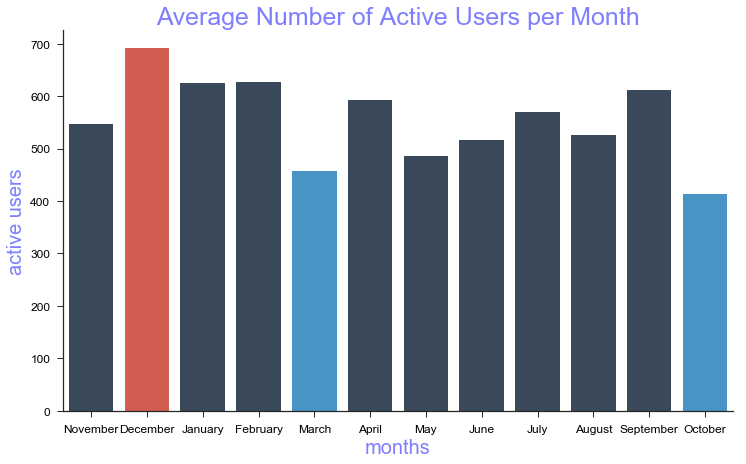

In [18]:
sns.set(style="ticks")

flatui = ["#34495e", "#e74c3c", "#34495e", "#34495e", "#3498db", "#34495e","#34495e","#34495e","#34495e","#34495e","#34495e","#3498db"]

# This Function takes as input a custom palette
g = sns.barplot(x="Date", y="Active Users", palette=sns.color_palette(flatui),data=bloomfire_active_users_monthly,ci=None)

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('Average Number of Active Users per Month',
    fontsize=25,color="b",alpha=0.5)
# Set the xlabel of the graph from here
g.set_xlabel("months",size = 20,color="b",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("active users",size = 20,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=12,labelcolor="black")

In [60]:
members_bloomfire_by_federation_fed = set(members_bloomfire_by_federation[members_bloomfire_by_federation['type']=='yes']['Organization'])
print(len(members_bloomfire_by_federation_fed))
print(round(len(members_bloomfire_by_federation_fed)/len(total_registered_fed)*100,2))

133
93.01


Users from 133 federations were active (logged in at least ones within the past year) in Bloomfire within the past year. It means that 94% of registered federations used FedCentral within the past year. Federations that weren't active in Bloomfire within the past year are displayed below:

In [61]:
for fed in total_registered_fed:
    if fed not in members_bloomfire_by_federation_fed:
        print(fed)

The Jewish Federation of Raleigh-Cary
Jewish Federation of Volusia & Flagler Counties
Jewish Community Federation of the Mohawk Valley
Jewish Federation of Sioux City
Merrimack Valley Jewish Federation
Flint Jewish Federation
Jewish Federation of Greater New Bedford
Jewish Federation of Greater Des Moines
Jewish Federation of the Quad Cities
Windsor Jewish Federation


In [62]:
members_bloomfire_by_federation_net = set(members_bloomfire_by_federation[members_bloomfire_by_federation['type']=='no']['Organization'])
print(len(members_bloomfire_by_federation_net))
print(round(len(members_bloomfire_by_federation_net)/len(total_registered_net)*100,2))

29
64.44


Users from 29 networks were active (logged in at least ones within the past year) in Bloomfire within the past year. It means that 64% of registered federations used FedCentral within the past year. Networks that weren't active in Bloomfire within the past year are displayed below:

In [63]:
for net in total_registered_net:
    if net not in members_bloomfire_by_federation_net:
        print(net)

Jewish Federation of Brevard & Indian River Counties
Jewish Federation of Greater Lafayette Inc
NEW HAMPSHIRE
Ithaca Area United Jewish Community
Jewish Community Council of Greater Waco and Central Texas
Jewish Community Alliance of Lancaster
Jewish Federation of Lincoln
Duluth UJC
Jewish Federation of Huntsville & North Alabama
Athens Jewish Welfare Fund
GEORGIA
JCC-Federation of San Luis Obispo
Jewish Federation of Macon & Middle Georgia
Atlantic Jewish Council
United Jewish Federation
Jewish Council for North Central Florida Inc


In [64]:
bloomfire_users=pd.DataFrame()
bloomfire_users['category'] = ['total federations','federations registered in Bloomfire','federations active within the past year',]

In [185]:
bloomfire_users = pd.DataFrame(columns=['category','# registered','% registered','# active past year','% active past year'])
bloomfire_users['category'] = ['Users','Ferderations','Newtworks']
bloomfire_users['# registered'] = [total_users,len(total_registered_fed),len(total_registered_net)]
bloomfire_users['% registered'] = ['NaN', round(len(total_registered_fed)*100/len(federations_fed),2),round(len(total_registered_net)*100/len(federations_net),2)]
bloomfire_users['# active past year'] = [len(members_bloomfire_by_federation),(len(members_bloomfire_by_federation_fed)),(len(members_bloomfire_by_federation_net))]
bloomfire_users['% active past year'] = [round(len(members_bloomfire_by_federation)*100/total_users,2),round(len(members_bloomfire_by_federation_fed)*100/len(total_registered_fed),2),round(len(members_bloomfire_by_federation_net)*100/len(total_registered_net),2)]
bloomfire_users

,category,# registered,% registered,# active past year,% active past year
0,Users,3865,NaN,1537,39.77
1,Ferderations,143,99.31,133,93.01
2,Newtworks,45,15.25,29,64.44


 #### Contributions,Views, Coments, Hi-Fives, Follows within the past year.

In [66]:
contributions = pd.read_csv('contributions.csv')
questions = pd.read_csv('questions.csv')

In [120]:
table2 = pd.DataFrame(columns=['Type','Total','# federations','% federations'])

table2['Type'] = ['Contributions(Posts+Questions)','Views','Comments','Hi-Fives','Follows']

total_contributions = members_bloomfire_by_federation['Contributions'].sum()
total_views = members_bloomfire_by_federation['Views'].sum()
total_comments = members_bloomfire_by_federation['Comments'].sum()
total_hi_fives = members_bloomfire_by_federation['Hi-Fives'].sum()
total_follows = members_bloomfire_by_federation['Follows'].sum()
table2['Total'] = [total_contributions,total_views,total_comments,total_hi_fives,total_follows]

contributions_fed = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Contributions']>0) & (members_bloomfire_by_federation['type']=='yes')]['Organization'])
views_bloomfire_fed = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Views']>0) & (members_bloomfire_by_federation['type']=='yes')]['Organization'])
comments_fed = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Comments']>0) & (members_bloomfire_by_federation['type']=='yes')]['Organization'])
hi_fives_fed = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Hi-Fives']>0) & (members_bloomfire_by_federation['type']=='yes')]['Organization'])
follows_fed = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Follows']>0) & (members_bloomfire_by_federation['type']=='yes')]['Organization'])
table2['# federations'] = [len(contributions_fed),len(views_bloomfire_fed),len(comments_fed),len(hi_fives_fed),len(follows_fed)]

table2['% federations'] = [round(len(contributions_fed)*100/len(total_registered_fed),2),round(len(views_bloomfire_fed)*100/len(total_registered_fed),2),round(len(comments_fed)*100/len(total_registered_fed),2),round(len(hi_fives_fed)*100/len(total_registered_fed),2),round(len(follows_fed)*100/len(total_registered_fed),2)]

contributions_net = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Contributions']>0) & (members_bloomfire_by_federation['type']=='no')]['Organization'])
views_net = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Views']>0) & (members_bloomfire_by_federation['type']=='no')]['Organization'])
comments_net = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Comments']>0) & (members_bloomfire_by_federation['type']=='no')]['Organization'])
hi_fives_net = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Hi-Fives']>0) & (members_bloomfire_by_federation['type']=='no')]['Organization'])
follows_net = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Follows']>0) & (members_bloomfire_by_federation['type']=='no')]['Organization'])
table2['# networks'] = [len(contributions_net),len(views_net),len(comments_net),len(hi_fives_net),len(follows_net)]
table2['% networks'] = [round(len(contributions_net)*100/len(total_registered_net),2),round(len(views_net)*100/len(total_registered_net),2),round(len(comments_net)*100/len(total_registered_net),2),round(len(hi_fives_net)*100/len(total_registered_net),2),round(len(follows_net)*100/len(total_registered_net),2)]
table2

,Type,Total,# federations,% federations,# networks,% networks
0,Contributions(Posts+Questions),1641,111,77.62,13,28.89
1,Views,23538,131,91.61,27,60.00
2,Comments,212,74,51.75,5,11.11
3,Hi-Fives,78,29,20.28,1,2.22
4,Follows,2277,112,78.32,16,35.56


See statistics for contributions below:

In [68]:
post = len(contributions[contributions['Type']=='Post'])
question = len(contributions[contributions['Type']=='Question'])
contributions_stats = pd.DataFrame()
contributions_stats['Contribution Type'] = ['Post','Question']
contributions_stats['Total'] = [post,question]
contributions_stats['# Views'] = [contributions[contributions['Type']=='Post']['Total Views'].sum(), contributions[contributions['Type']=='Question']['Total Views'].sum()]

In [69]:
contributions_stats

,Contribution Type,Total,# Views
0,Post,560,9409
1,Question,935,13638


See statistics for questions below:

In [70]:
questions_stats = pd.DataFrame()
questions_stats['characteristics'] = ['% of answered questions','Average Time to First Answer in mins',
                                      'Average Answers','Average Answer Hi-Fives']
questions_stats['values'] = [round(len(questions[questions['Status']=='Answered'])*100/len(questions),2),
                             round((questions['Time to First Answer']/60).median(),0), round(questions['Total Answers'].mean(),2),
                             round(questions['Answer Hi-Fives'].mean())]
questions_stats

,characteristics,values
0,% of answered questions,72.03
1,Average Time to First Answer in mins,34.00
2,Average Answers,2.52
3,Average Answer Hi-Fives,0.00


See daily statistics below:

In [71]:
daily_stats = pd.DataFrame()
daily_engagement = pd.read_csv('daily_engagement.csv')
daily_stats['characteristics'] = ['Daily Average Active Members','Daily Average Contributing Members', 'Daily Average Total Contributions',
                                    'Daily Average Total Views']
daily_stats['values'] = [round(daily_engagement['Active Members'].mean(),2),
                         round(daily_engagement['Contributing Members'].mean(),0),round(daily_engagement['Total Contributions'].mean(),2),
                         round(daily_engagement['Total Views'].mean(),2)]
daily_stats

,characteristics,values
0,Daily Average Active Members,47.08
1,Daily Average Contributing Members,3.00
2,Daily Average Total Contributions,3.80
3,Daily Average Total Views,58.61


### Assets

In [72]:
assets = pd.read_csv('assets.csv')
assets = assets[assets['Date Approved']!='NaN']
assets = assets[assets['Date Approved']!='1935']
assets=assets[assets['Date Approved'].str.contains('[A-Za-z]')==False]
assets['Date Approved'] = assets['Date Approved'].str.split(' ',expand = True)[0]
assets = assets[pd.isnull(assets['Date Approved'])==False]
assets['Date Approved'] = pd.to_datetime(assets['Date Approved'], format ='%m/%d/%y')
assets_yearly = assets[assets['Date Approved'] < '2019/1/1']
assets_past_year_by_federations = pd.merge(assets_yearly,fedcentral_users_by_federation[['Email','code','name','type']],how='left',left_on='Author (email)',right_on='Email')
assets_yearly.set_index('Date Approved',inplace=True)
assets_past_year_by_federations.set_index('Date Approved',inplace=True)

See assets statistics below:

In [73]:
assets_added = pd.DataFrame(assets_yearly.resample('Y')['ID'].count())
assets_added.reset_index(inplace=True)
assets_added.columns=[['Year','# Assets Added']]
assets_added['Year'] = ['2015','2016','2017','2018']
assets_cumsum = pd.DataFrame(assets_yearly.resample('Y')['ID'].count().cumsum())
assets_added['Total Assets'] = assets_cumsum['ID'].values
#assets_past_year_by_federations.set_index('Date Approved',inplace=True)
assets_past_year_by_federations
assets_added['# of federations uploaded assests'] = assets_past_year_by_federations[assets_past_year_by_federations['type']=='yes'].resample('Y')['name'].nunique().values
#assets_added['# of networks uploaded assests'] = assets_past_year_by_federations[assets_past_year_by_federations['type']=='no'].resample('Y')['name'].nunique().values
assets_added['% of change'] = assets_added['Total Assets'].pct_change()*100
assets_added

,Year,# Assets Added,Total Assets,# of federations uploaded assests,% of change
0,2015,2321,2321,3,NaN
1,2016,1659,3980,59,71.477811
2,2017,1903,5883,33,47.814070
3,2018,969,6852,28,16.471188


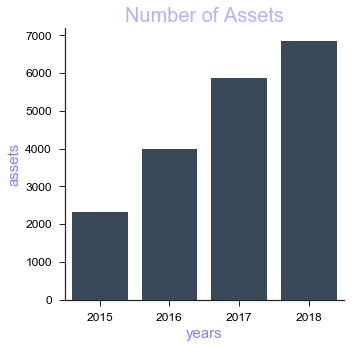

In [3]:
assets_added = pd.DataFrame({'Year':['2015','2016','2017','2018'],'Total Assets':[2321,3980,5883,6852]})
sns.set(style="ticks")

flatui = ["#34495e"]

# This Function takes as input a custom palette
g = sns.barplot(x='Year', y='Total Assets', palette=sns.color_palette(flatui),data=assets_added, ci=None)

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(5,5)
# Set the Title of the graph from here
g.axes.set_title('Number of Assets',
    fontsize=20,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("years",size = 15,color="b",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("assets",size = 15,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=12,labelcolor="black")

## Federation Report (Snapshot of Data on a Per Federation Basis)

### Combined Jewish Philanthropies of Greater Boston Inc.

#### Number of registered FedCentral users

In [127]:
table = pd.DataFrame(columns=['admins','values'])
active_fedcentral = len(set(fedcentral_users_by_federation[(fedcentral_users_by_federation['Last Login']>'10/31/2017') & 
                                       (fedcentral_users_by_federation['Last Login']<'11/1/2018') & 
                                       (fedcentral_users_by_federation['code']=='22100')]['Email']))
active_bloomfire = members_bloomfire_by_federation[members_bloomfire_by_federation['code']=='22100']['Email'].nunique()
members_bloomfire_by_federation[members_bloomfire_by_federation['code']=='22100']
total_fedcentral = len(set(fedcentral_users_by_federation[fedcentral_users_by_federation['code']=='22100']['Email']))
table['admins'] = ['# admins','# registered FedCentral (and Bloomfire) users',
                   '# FedCentral active users past year','% FedCentral active past year',
                  '# Bloomfire active users past year','% Bloomfire active past year']
table['values'] = [31, total_fedcentral, active_fedcentral, round(active_fedcentral*100/total_fedcentral,2),
                  active_bloomfire,round(active_bloomfire*100/total_fedcentral,2)]
table

,admins,values
0,# admins,31.00
1,# registered FedCentral (and Bloomfire) users,65.00
2,# FedCentral active users past year,22.00
3,% FedCentral active past year,33.85
4,# Bloomfire active users past year,11.00
5,% Bloomfire active past year,16.92


In [123]:
views_fed['Pageviews'] = views_fed['Pageviews'].str.replace(',','')
views_fed['Pageviews'] = pd.to_numeric(views_fed['Pageviews'])

table = pd.DataFrame()
table['characteristics'] = ['# views past year','# assets downloads past year','# assets downloads+views past year','# searches past year']
table['values'] = [views_fed[views_fed['code']=='22100']['Pageviews'].sum(),
                   downloads_fed[downloads_fed['User Organization']=='22100']['Total Events'].sum(),
                   views_fed[(views_fed['Page'].str.contains('/view')) & (views_fed['User Organization']=='22100')]['Pageviews'].sum() + downloads_fed[downloads_fed['User Organization']=='22100']['Total Events'].sum(),
                   searches_fed[searches_fed['User Organization']=='22100']['Total Events'].sum()]
table

,characteristics,values
0,# views past year,175.0
1,# assets downloads past year,132.0
2,# assets downloads+views past year,166.0
3,# searches past year,141.0
